In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [6]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


## Data Standardization

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
standardized_data = scaler.transform(X)

In [11]:
X = standardized_data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [13]:
classifier_model = SVC(kernel='linear')

In [14]:
classifier_model.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
train_test = classifier_model.predict(X_train)
y_pred = classifier_model.predict(X_test)

In [16]:
train_score = accuracy_score(train_test,y_train)
test_score = accuracy_score(y_pred,y_test)
train_score, test_score

(0.7736156351791531, 0.7727272727272727)

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[89, 11],
       [24, 30]], dtype=int64)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

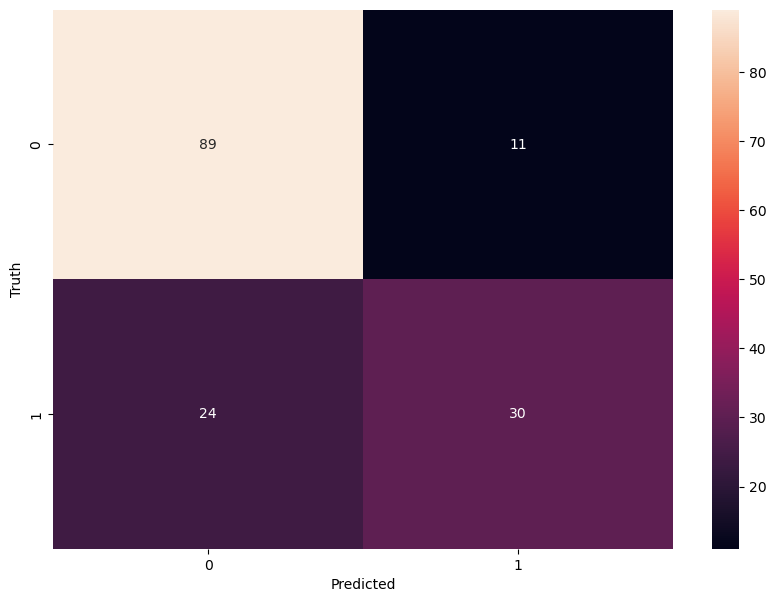

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Making a Predictive System

In [60]:
input_data = (1,20,20,25,0,26.6,0.31,60)

np_array_input_data = np.asarray(input_data)

reshape_np_array = np_array_input_data.reshape(1,-1)

std_reshape = scaler.transform(reshape_np_array)
final_predict = classifier_model.predict(std_reshape)
if final_predict[0] == 1:
    print(f'{final_predict[0]} : Patient has diabets')
if final_predict[0] == 0:
    print(f'{final_predict[0]} : Patient has not diabets')

0 : Patient has not diabets
